In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep = ';')

In [3]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Visualizing the quality of wine

In [4]:
import seaborn as sns

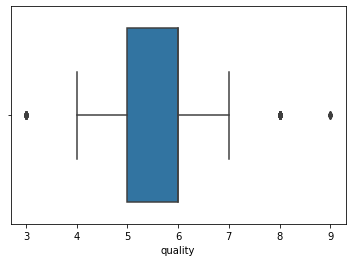

In [5]:
sns.boxplot(wine_data.quality)

Conclusion on box plot : Seems to have some outliers , we have to remove the outliers

In [6]:
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1
IQR

fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64

In [7]:
wine_data_out = wine_data[~( (wine_data < (Q1 - 1.5*IQR))|(wine_data > (Q3 + 1.5*IQR)) ).any(axis=1)]

In [8]:
wine_data_out.shape

(3854, 12)

Reconfirming whether the outliers are removed or not

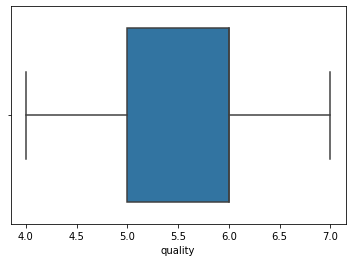

In [9]:
sns.boxplot(wine_data_out.quality)

In [10]:
from sklearn.preprocessing import MinMaxScaler
wine_data_df = MinMaxScaler().fit_transform(wine_data_out.drop(columns= ['quality']))

In [11]:
target_data  = wine_data_out.quality

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
trainX, testX, trainY, testY = train_test_split(wine_data_df, target_data)

In [14]:
from sklearn.linear_model import LogisticRegression
le = LogisticRegression()

In [15]:
le.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
testY.shape

(964,)

In [17]:
le.score(testX,testY)

0.5715767634854771

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(test, testY)

0.5715767634854771

In [19]:
test = le.predict(testX)
test.shape

(964,)

### identifying the best fit by using the polynomialfeatures

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
for i in range(1,11):
    pol = PolynomialFeatures(degree = i)
    feature_data_new= pol.fit_transform(wine_data_df)
    trainX, testX, trainY, testY = train_test_split(feature_data_new,target_data)
    le.fit(trainX, trainY)
    print("degree", i)
    print("acuracy", le.score(testX,testY))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


degree 1
acuracy 0.5352697095435685
degree 2
acuracy 0.5684647302904564


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


degree 3
acuracy 0.5850622406639004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


degree 4
acuracy 0.5860995850622407


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### trying with decision tree


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
de = DecisionTreeClassifier()

In [24]:
de.fit(trainX , trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
accuracy_score(de.predict(testX),testY)

0.6130705394190872